In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# data science
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# ML Helpers/Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# fun ones
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
df1 = pd.read_csv("../data_cleaning/data/ml_clean_homicide_data.csv", encoding = 'latin1')
df1

,uid,disposition,victim_sex,victim_race,victim_age,age_range,reported_date,reported_year,reported_month,reported_weekday,season,city,state,lat,lon,LOCATION,POPULATION
0,Alb-000001,No Arrest,Male,Hispanic,78,65+,2010-05-04,2010,May,Tuesday,Spring,Albuquerque,NM,35.095788,-106.538555,"Albuquerque, NM",545852
1,Alb-000002,Arrest Made,Male,Hispanic,17,0-17,2010-02-16,2010,February,Tuesday,Winter,Albuquerque,NM,35.056810,-106.715321,"Albuquerque, NM",545852
2,Alb-000003,No Arrest,Female,White,15,0-17,2010-06-01,2010,June,Tuesday,Summer,Albuquerque,NM,35.086092,-106.695568,"Albuquerque, NM",545852
3,Alb-000004,Arrest Made,Male,Hispanic,32,30-44,2010-01-01,2010,January,Friday,Winter,Albuquerque,NM,35.078493,-106.556094,"Albuquerque, NM",545852
4,Alb-000005,No Arrest,Female,White,72,65+,2010-01-02,2010,January,Saturday,Winter,Albuquerque,NM,35.130357,-106.580986,"Albuquerque, NM",545852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47473,Was-001380,Arrest Made,Male,Black,29,18-29,2016-09-08,2016,September,Thursday,Fall,Washington,DC,38.828704,-77.002075,"Washington, DC",687576
47474,Was-001381,No Arrest,Male,Black,19,18-29,2016-09-13,2016,September,Tuesday,Fall,Washington,DC,38.822852,-77.001725,"Washington, DC",687576
47475,Was-001382,No Arrest,Male,Black,23,18-29,2016-11-14,2016,November,Monday,Fall,Washington,DC,38.828025,-77.002511,"Washington, DC",687576
47476,Was-001383,No Arrest,Male,Black,24,18-29,2016-11-30,2016,November,Wednesday,Fall,Washington,DC,38.820476,-77.008640,"Washington, DC",687576


In [3]:
# Select and retain only the desired columns
final_columns_to_keep = ['victim_age','victim_sex','victim_race', 'reported_date', 'reported_year','reported_month', 'reported_weekday', 'season', 'city', 'state', 'POPULATION', 'disposition']
df = df1[final_columns_to_keep]
df.head()

,victim_age,victim_sex,victim_race,reported_date,reported_year,reported_month,reported_weekday,season,city,state,POPULATION,disposition
0,78,Male,Hispanic,2010-05-04,2010,May,Tuesday,Spring,Albuquerque,NM,545852,No Arrest
1,17,Male,Hispanic,2010-02-16,2010,February,Tuesday,Winter,Albuquerque,NM,545852,Arrest Made
2,15,Female,White,2010-06-01,2010,June,Tuesday,Summer,Albuquerque,NM,545852,No Arrest
3,32,Male,Hispanic,2010-01-01,2010,January,Friday,Winter,Albuquerque,NM,545852,Arrest Made
4,72,Female,White,2010-01-02,2010,January,Saturday,Winter,Albuquerque,NM,545852,No Arrest


In [4]:
df["disposition"] = df["disposition"].apply(lambda x: 1 if x == "Arrest Made" else 0)
df

C:\Users\Home\AppData\Local\Temp\ipykernel_3684\3285981948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["disposition"] = df["disposition"].apply(lambda x: 1 if x == "Arrest Made" else 0)


,victim_age,victim_sex,victim_race,reported_date,reported_year,reported_month,reported_weekday,season,city,state,POPULATION,disposition
0,78,Male,Hispanic,2010-05-04,2010,May,Tuesday,Spring,Albuquerque,NM,545852,0
1,17,Male,Hispanic,2010-02-16,2010,February,Tuesday,Winter,Albuquerque,NM,545852,1
2,15,Female,White,2010-06-01,2010,June,Tuesday,Summer,Albuquerque,NM,545852,0
3,32,Male,Hispanic,2010-01-01,2010,January,Friday,Winter,Albuquerque,NM,545852,1
4,72,Female,White,2010-01-02,2010,January,Saturday,Winter,Albuquerque,NM,545852,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47473,29,Male,Black,2016-09-08,2016,September,Thursday,Fall,Washington,DC,687576,1
47474,19,Male,Black,2016-09-13,2016,September,Tuesday,Fall,Washington,DC,687576,0
47475,23,Male,Black,2016-11-14,2016,November,Monday,Fall,Washington,DC,687576,0
47476,24,Male,Black,2016-11-30,2016,November,Wednesday,Fall,Washington,DC,687576,0


In [5]:
# Drop reported date column
drop_reporteddate = df.drop('reported_date', axis = 1, inplace=True)

df

C:\Users\Home\AppData\Local\Temp\ipykernel_3684\1097537222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_reporteddate = df.drop('reported_date', axis = 1, inplace=True)


,victim_age,victim_sex,victim_race,reported_year,reported_month,reported_weekday,season,city,state,POPULATION,disposition
0,78,Male,Hispanic,2010,May,Tuesday,Spring,Albuquerque,NM,545852,0
1,17,Male,Hispanic,2010,February,Tuesday,Winter,Albuquerque,NM,545852,1
2,15,Female,White,2010,June,Tuesday,Summer,Albuquerque,NM,545852,0
3,32,Male,Hispanic,2010,January,Friday,Winter,Albuquerque,NM,545852,1
4,72,Female,White,2010,January,Saturday,Winter,Albuquerque,NM,545852,0
...,...,...,...,...,...,...,...,...,...,...,...
47473,29,Male,Black,2016,September,Thursday,Fall,Washington,DC,687576,1
47474,19,Male,Black,2016,September,Tuesday,Fall,Washington,DC,687576,0
47475,23,Male,Black,2016,November,Monday,Fall,Washington,DC,687576,0
47476,24,Male,Black,2016,November,Wednesday,Fall,Washington,DC,687576,0


In [6]:
df.columns

Index(['victim_age', 'victim_sex', 'victim_race', 'reported_year',
       'reported_month', 'reported_weekday', 'season', 'city', 'state',
       'POPULATION', 'disposition'],
      dtype='object')

In [7]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# value counts
for col in cat_cols:
    print(df[col].nunique())
    print(df[col].value_counts())
    print()

2
Male      40387
Female     7091
Name: victim_sex, dtype: int64

5
Black       33062
Hispanic     6817
White        6259
Asian         676
Other         664
Name: victim_race, dtype: int64

12
July         4624
August       4360
June         4273
May          4210
September    4131
October      4060
December     3890
November     3886
April        3779
January      3682
March        3622
February     2961
Name: reported_month, dtype: int64

7
Sunday       7850
Saturday     7619
Monday       6853
Friday       6446
Tuesday      6331
Wednesday    6256
Thursday     6123
Name: reported_weekday, dtype: int64

4
Summer    13257
Fall      12077
Spring    11611
Winter    10533
Name: season, dtype: int64

47
Chicago           5523
Philadelphia      3036
Houston           2908
Baltimore         2827
Detroit           2496
Los Angeles       2196
St. Louis         1661
Memphis           1510
New Orleans       1394
Indianapolis      1321
Washington        1308
Las Vegas         1299
Jacksonville   

In [8]:
df2 = pd.get_dummies(df)
df2

,victim_age,reported_year,POPULATION,disposition,victim_sex_Female,victim_sex_Male,victim_race_Asian,victim_race_Black,victim_race_Hispanic,victim_race_Other,...,state_NM,state_NV,state_NY,state_OH,state_OK,state_PA,state_TN,state_TX,state_VA,state_WI
0,78,2010,545852,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,17,2010,545852,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,15,2010,545852,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,2010,545852,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,72,2010,545852,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47473,29,2016,687576,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
47474,19,2016,687576,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
47475,23,2016,687576,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
47476,24,2016,687576,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df2.dtypes

victim_age           int64
reported_year        int64
POPULATION           int64
disposition          int64
victim_sex_Female    uint8
                     ...  
state_PA             uint8
state_TN             uint8
state_TX             uint8
state_VA             uint8
state_WI             uint8
Length: 108, dtype: object

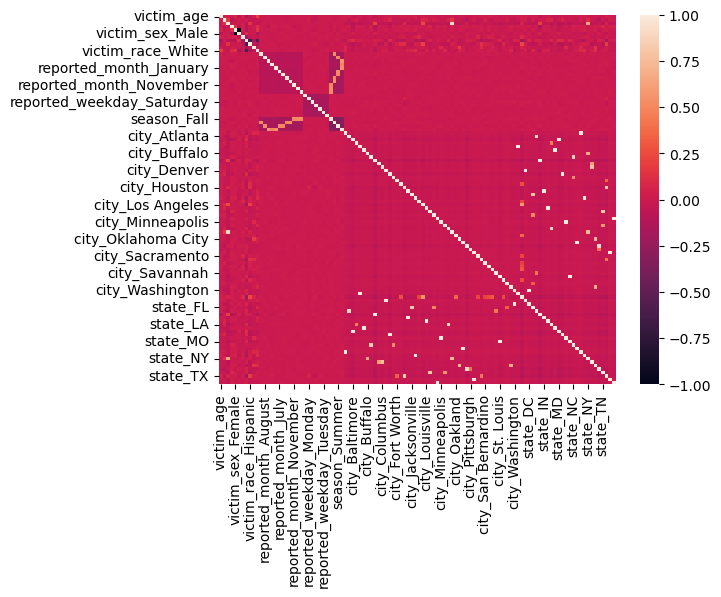

In [10]:
corrs = df2.corr()
sns.heatmap(corrs)
plt.show()

In [11]:
abs(corrs["disposition"]).sort_values(ascending=False)

disposition                   1.000000
city_Chicago                  0.162975
state_IL                      0.162975
victim_race_White             0.106228
victim_sex_Female             0.102491
                                ...   
reported_weekday_Saturday     0.000664
reported_weekday_Wednesday    0.000546
state_MN                      0.000473
city_Minneapolis              0.000473
city_Jacksonville             0.000296
Name: disposition, Length: 108, dtype: float64

In [12]:
# Create our train/test set
X = df2.drop(columns=["disposition"])
y = df2["disposition"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y, test_size = 0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(37982, 107) (37982,)
(9496, 107) (9496,)


In [13]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

TRAINING SET METRICS
[[19406     0]
 [18576     0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.68     19406
           1       0.00      0.00      0.00     18576

    accuracy                           0.51     37982
   macro avg       0.26      0.50      0.34     37982
weighted avg       0.26      0.51      0.35     37982


TESTING SET METRICS
[[4852    0]
 [4644    0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      4852
           1       0.00      0.00      0.00      4644

    accuracy                           0.51      9496
   macro avg       0.26      0.50      0.34      9496
weighted avg       0.26      0.51      0.35      9496



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metr

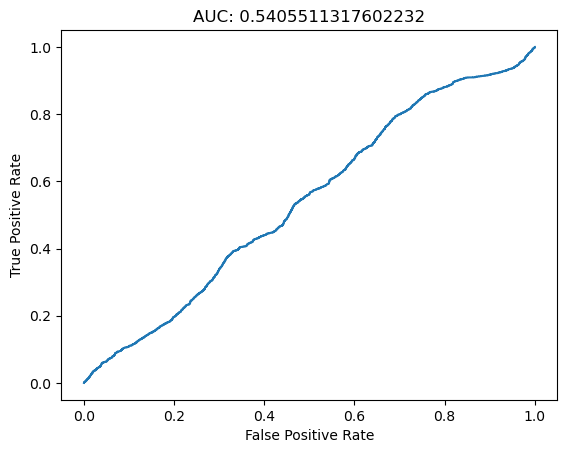

In [14]:
  # init the model
lr = LogisticRegression()
doMLClassification(lr, X_train, y_train, X_test, y_test)

In [15]:
lr.score(X_test, y_test)

0.5109519797809604

In [16]:
lr.score(X_train, y_train)

0.5109262282133642

In [17]:
# init the model
#knn = KNeighborsClassifier(n_neighbors=25)
#doMLClassification(knn, X_train, y_train, X_test, y_test)

In [18]:
#knn.score(X_test, y_test)
#knn.score(X_train, y_train)

In [19]:
# init the model
#dt = DecisionTreeClassifier(random_state=42)
#doMLClassification(dt, X_train, y_train, X_test, y_test)

In [20]:
#dt.score(X_test, y_test)
#dt.score(X_train, y_train)

TRAINING SET METRICS
[[19294   112]
 [  151 18425]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19406
           1       0.99      0.99      0.99     18576

    accuracy                           0.99     37982
   macro avg       0.99      0.99      0.99     37982
weighted avg       0.99      0.99      0.99     37982


TESTING SET METRICS
[[2871 1981]
 [1779 2865]]
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      4852
           1       0.59      0.62      0.60      4644

    accuracy                           0.60      9496
   macro avg       0.60      0.60      0.60      9496
weighted avg       0.60      0.60      0.60      9496



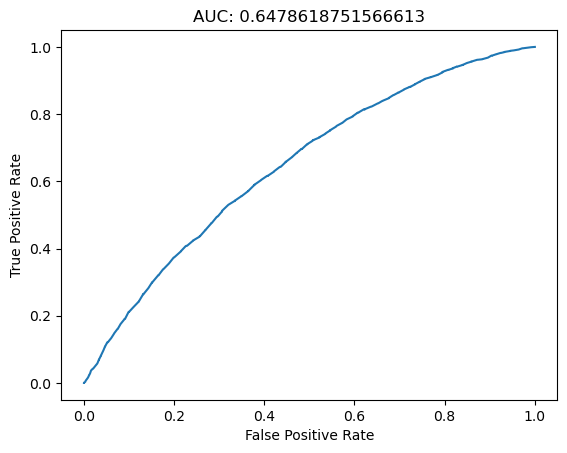

In [21]:
# init the model
#rf = RandomForestClassifier(random_state=42)
#doMLClassification(rf, X_train, y_train, X_test, y_test)

In [35]:
#rf.score(X_test, y_test)


0.6040438079191238

In [57]:
#rf.score(X_train, y_train)

0.9930756674214102

TRAINING SET METRICS
[[12422  6984]
 [ 7283 11293]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64     19406
           1       0.62      0.61      0.61     18576

    accuracy                           0.62     37982
   macro avg       0.62      0.62      0.62     37982
weighted avg       0.62      0.62      0.62     37982


TESTING SET METRICS
[[3107 1745]
 [1875 2769]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      4852
           1       0.61      0.60      0.60      4644

    accuracy                           0.62      9496
   macro avg       0.62      0.62      0.62      9496
weighted avg       0.62      0.62      0.62      9496



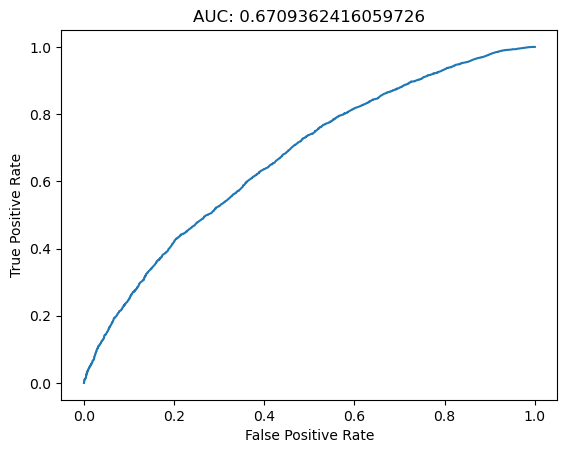

In [23]:
# init the model
ada = AdaBoostClassifier(random_state=42)
doMLClassification(ada, X_train, y_train, X_test, y_test)

In [24]:
ada.score(X_test, y_test)


0.6243747038070665

In [37]:
ada.score(X_train, y_train)

0.6243747038070665

TRAINING SET METRICS
[[19401     5]
 [  258 18318]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19406
           1       1.00      0.99      0.99     18576

    accuracy                           0.99     37982
   macro avg       0.99      0.99      0.99     37982
weighted avg       0.99      0.99      0.99     37982


TESTING SET METRICS
[[2846 2006]
 [1909 2735]]
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      4852
           1       0.58      0.59      0.58      4644

    accuracy                           0.59      9496
   macro avg       0.59      0.59      0.59      9496
weighted avg       0.59      0.59      0.59      9496



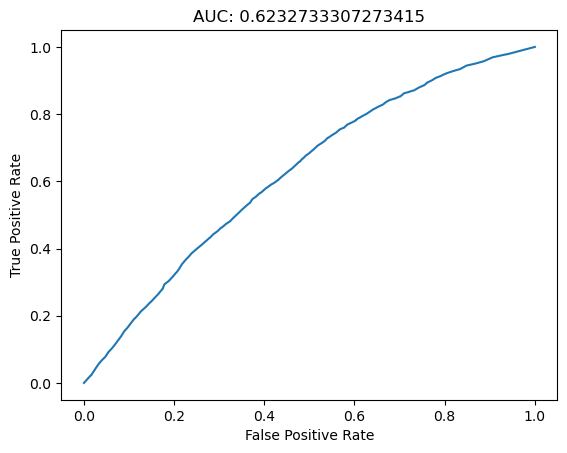

In [25]:
# init the model
#et = ExtraTreesClassifier(random_state=42)
#doMLClassification(et, X_train, y_train, X_test, y_test)

In [53]:
#et.score(X_test, y_test)


0.5877211457455771

In [54]:
#et.score(X_train, y_train)

0.9930756674214102

TRAINING SET METRICS
[[12619  6787]
 [ 7069 11507]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.65     19406
           1       0.63      0.62      0.62     18576

    accuracy                           0.64     37982
   macro avg       0.63      0.63      0.63     37982
weighted avg       0.64      0.64      0.64     37982


TESTING SET METRICS
[[3110 1742]
 [1825 2819]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      4852
           1       0.62      0.61      0.61      4644

    accuracy                           0.62      9496
   macro avg       0.62      0.62      0.62      9496
weighted avg       0.62      0.62      0.62      9496



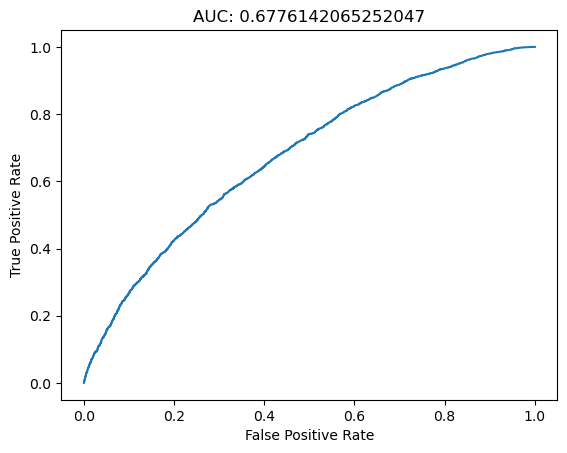

In [55]:
# init the model
gb = GradientBoostingClassifier(random_state=42)
doMLClassification(gb, X_train, y_train, X_test, y_test)

In [28]:
gb.score(X_test, y_test)


0.6351956189774104

In [39]:
gb.score(X_train, y_train)

0.6351956189774104

TRAINING SET METRICS
[[14182  5224]
 [ 5525 13051]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     19406
           1       0.71      0.70      0.71     18576

    accuracy                           0.72     37982
   macro avg       0.72      0.72      0.72     37982
weighted avg       0.72      0.72      0.72     37982


TESTING SET METRICS
[[3117 1735]
 [1832 2812]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      4852
           1       0.62      0.61      0.61      4644

    accuracy                           0.62      9496
   macro avg       0.62      0.62      0.62      9496
weighted avg       0.62      0.62      0.62      9496



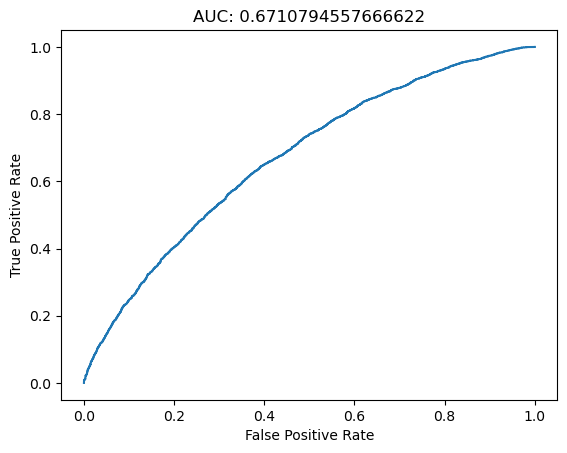

In [29]:
 # init the model
xgb = XGBClassifier(random_state=42)
doMLClassification(xgb, X_train, y_train, X_test, y_test)

In [46]:
xgb.score(X_test, y_test)


0.6243681550126369

In [47]:
xgb.score(X_train, y_train)

0.716997525143489

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18576, number of negative: 19406
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 37982, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489074 -> initscore=-0.043712
[LightGBM] [Info] Start training from score -0.043712
TRAINING SET METRICS
[[12876  6530]
 [ 6231 12345]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.67     19406
           1       0.65      0.66      0.66     18576

    accuracy                           0.66     37982
   macro avg       0.66      0.66      0.66     37982
weighted avg       0.66      0.66  

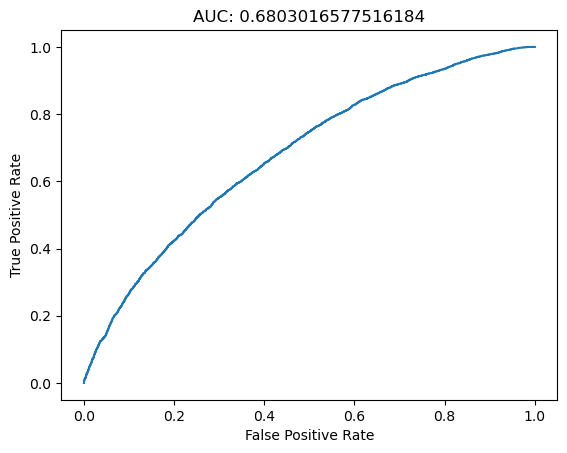

In [31]:
 # init the model
lgb = LGBMClassifier(random_state=42)
doMLClassification(lgb, X_train, y_train, X_test, y_test)

In [32]:
lgb.score(X_test, y_test)


0.6640250645042388

In [41]:
lgb.score(X_train, y_train)

0.6640250645042388

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18576, number of negative: 19406
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 37982, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489074 -> initscore=-0.043712
[LightGBM] [Info] Start training from score -0.043712
TRAINING SET METRICS
[[12876  6530]
 [ 6231 12345]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.67     19406
           1       0.65      0.66      0.66     18576

    accuracy                           0.66     37982
   macro avg       0.66      0.66      0.66     37982
weighted avg       0.66      0.66      0.66     37982


TESTING SET METRICS
[[3048 1804]
 [1746 289

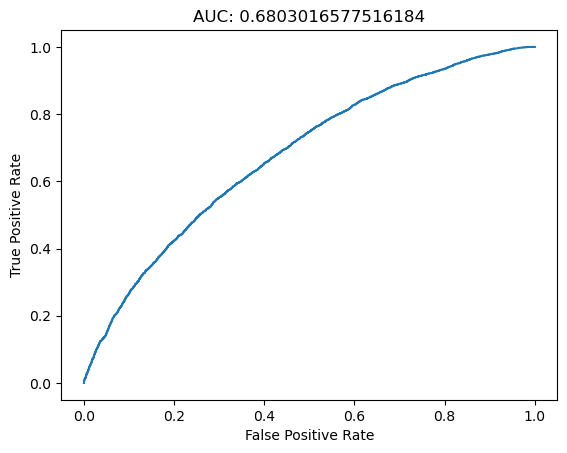

In [33]:
 # init the model
lgbm = LGBMClassifier(random_state=42)
doMLClassification(lgbm, X_train, y_train, X_test, y_test)

In [48]:
lgbm.score(X_test, y_test)


0.6261583824768323

In [49]:
lgbm.score(X_train, y_train)

0.6640250645042388

In [50]:
sorted(list(zip(lgb.feature_importances_, X.columns)), reverse=True)

[(688, 'victim_age'),
 (371, 'POPULATION'),
 (364, 'reported_year'),
 (64, 'victim_race_White'),
 (61, 'victim_sex_Female'),
 (47, 'victim_race_Black'),
 (45, 'reported_weekday_Tuesday'),
 (45, 'reported_weekday_Monday'),
 (41, 'season_Winter'),
 (39, 'season_Spring'),
 (39, 'season_Fall'),
 (37, 'reported_weekday_Friday'),
 (36, 'reported_month_December'),
 (35, 'reported_weekday_Sunday'),
 (34, 'reported_weekday_Saturday'),
 (33, 'city_Baltimore'),
 (32, 'season_Summer'),
 (32, 'reported_weekday_Thursday'),
 (32, 'reported_month_January'),
 (32, 'city_New Orleans'),
 (30, 'city_Detroit'),
 (29, 'reported_weekday_Wednesday'),
 (28, 'city_Miami'),
 (28, 'city_Chicago'),
 (24, 'reported_month_February'),
 (23, 'reported_month_October'),
 (23, 'city_Milwaukee'),
 (22, 'victim_race_Hispanic'),
 (22, 'state_TN'),
 (21, 'state_CA'),
 (21, 'reported_month_November'),
 (21, 'reported_month_May'),
 (21, 'city_Omaha'),
 (20, 'city_Richmond'),
 (19, 'reported_month_July'),
 (19, 'city_Tulsa'),
 

In [51]:
sorted(list(zip(lgbm.feature_importances_, X.columns)), reverse=True)

[(688, 'victim_age'),
 (371, 'POPULATION'),
 (364, 'reported_year'),
 (64, 'victim_race_White'),
 (61, 'victim_sex_Female'),
 (47, 'victim_race_Black'),
 (45, 'reported_weekday_Tuesday'),
 (45, 'reported_weekday_Monday'),
 (41, 'season_Winter'),
 (39, 'season_Spring'),
 (39, 'season_Fall'),
 (37, 'reported_weekday_Friday'),
 (36, 'reported_month_December'),
 (35, 'reported_weekday_Sunday'),
 (34, 'reported_weekday_Saturday'),
 (33, 'city_Baltimore'),
 (32, 'season_Summer'),
 (32, 'reported_weekday_Thursday'),
 (32, 'reported_month_January'),
 (32, 'city_New Orleans'),
 (30, 'city_Detroit'),
 (29, 'reported_weekday_Wednesday'),
 (28, 'city_Miami'),
 (28, 'city_Chicago'),
 (24, 'reported_month_February'),
 (23, 'reported_month_October'),
 (23, 'city_Milwaukee'),
 (22, 'victim_race_Hispanic'),
 (22, 'state_TN'),
 (21, 'state_CA'),
 (21, 'reported_month_November'),
 (21, 'reported_month_May'),
 (21, 'city_Omaha'),
 (20, 'city_Richmond'),
 (19, 'reported_month_July'),
 (19, 'city_Tulsa'),
 

In [52]:
sorted(list(zip(xgb.feature_importances_, X.columns)), reverse=True)

[(0.319244, 'city_Chicago'),
 (0.06890989, 'city_Charlotte'),
 (0.041049432, 'city_Baltimore'),
 (0.0385772, 'state_TN'),
 (0.028406966, 'city_Detroit'),
 (0.025293285, 'city_New Orleans'),
 (0.017441962, 'victim_race_White'),
 (0.01727399, 'city_Miami'),
 (0.015873985, 'city_Richmond'),
 (0.013143179, 'city_San Bernardino'),
 (0.012182923, 'city_Tulsa'),
 (0.01120897, 'city_Atlanta'),
 (0.011162087, 'city_Fresno'),
 (0.011075476, 'victim_sex_Female'),
 (0.010092107, 'city_Milwaukee'),
 (0.010016551, 'city_Memphis'),
 (0.009321211, 'state_NC'),
 (0.0091796005, 'city_Philadelphia'),
 (0.009019674, 'state_FL'),
 (0.00898666, 'state_TX'),
 (0.008089608, 'city_Buffalo'),
 (0.007976149, 'city_Stockton'),
 (0.007250976, 'city_Omaha'),
 (0.006725561, 'reported_year'),
 (0.006665328, 'city_Boston'),
 (0.0064586177, 'city_Fort Worth'),
 (0.006358992, 'city_Jacksonville'),
 (0.006240997, 'state_CA'),
 (0.0061334204, 'reported_month_December'),
 (0.006069655, 'state_NY'),
 (0.005726562, 'city_Hou

In [58]:
import pickle 

In [60]:
pickle.dump(lgbm, open('model.pkl', 'wb'))